In [1]:
import math

def calculate_score_and_profit(warehouses, stores, population_density, spending_amount, labor_availability, land_cost, 
                               max_stores_per_warehouse, profit_weight=1.0, land_cost_weight=1.0, labor_availability_weight=1.0):
    """
    Calculate the score and total profit for the positions of warehouses and stores.

    Parameters:
    - warehouses: List of tuples [(lat, lon), ...] for each warehouse
    - stores: List of tuples [(lat, lon), ...] for each store
    - population_density: Function that takes a store index and returns its population density
    - spending_amount: Function that takes a store index and returns its spending amount
    - labor_availability: Function that takes a warehouse index and returns its labor availability
    - land_cost: Function that takes a warehouse index and returns its land cost
    - max_stores_per_warehouse: Maximum number of stores a warehouse can supply
    - profit_weight: Weight for the profit potential factor
    - land_cost_weight: Weight for the land cost factor
    - labor_availability_weight: Weight for the labor availability factor

    Returns:
    - score: The calculated score for the given configuration
    - total_profit: The total profit earned for the given configuration
    """

    # Calculate the distance between two points using Euclidean distance
    def euclidean_distance(coord1, coord2):
        return math.sqrt((coord1[0] - coord2[0])**2 + (coord1[1] - coord2[1])**2)

    # Assign stores to the nearest warehouse with capacity consideration
    store_to_warehouse = [-1] * len(stores)
    warehouse_store_count = [0] * len(warehouses)

    for store_idx, store in enumerate(stores):
        min_distance = float('inf')
        best_warehouse_idx = -1
        for warehouse_idx, warehouse in enumerate(warehouses):
            if warehouse_store_count[warehouse_idx] < max_stores_per_warehouse:
                distance = euclidean_distance(store, warehouse)
                if distance < min_distance:
                    min_distance = distance
                    best_warehouse_idx = warehouse_idx

        if best_warehouse_idx != -1:
            store_to_warehouse[store_idx] = best_warehouse_idx
            warehouse_store_count[best_warehouse_idx] += 1

    # Calculate the total score and total profit
    total_profit_potential = 0
    total_cost = 0
    total_profit = 0

    for store_idx, warehouse_idx in enumerate(store_to_warehouse):
        if warehouse_idx != -1:
            distance = euclidean_distance(stores[store_idx], warehouses[warehouse_idx])
            profit_potential = (spending_amount(store_idx) * population_density(store_idx)) / (distance + 1)
            total_profit_potential += profit_weight * profit_potential

            # Calculate profit for each store
            profit = profit_weight * profit_potential
            total_profit += profit

    for warehouse_idx in range(len(warehouses)):
        cost = (land_cost_weight * land_cost(warehouse_idx)) - (labor_availability_weight * labor_availability(warehouse_idx))
        total_cost += cost

    score = total_profit_potential - total_cost
    return score, total_profit

# Example usage with hypothetical data
warehouses = [(10, 20), (15, 25)]  # List of warehouse coordinates
stores = [(12, 22), (18, 28), (17, 21)]  # List of store coordinates

# Hypothetical functions for population density, spending amount, labor availability, and land cost
def population_density(store_idx):
    return [100, 200, 150][store_idx]

def spending_amount(store_idx):
    return [1000, 1200, 1100][store_idx]

def labor_availability(warehouse_idx):
    return [500, 600][warehouse_idx]

def land_cost(warehouse_idx):
    return [300, 400][warehouse_idx]

max_stores_per_warehouse = 2  # Maximum number of stores a warehouse can supply

# Control variables to adjust the importance of each factor
profit_weight = 1.5
land_cost_weight = 1.0
labor_availability_weight = 0.8

score, total_profit = calculate_score_and_profit(
    warehouses, 
    stores, 
    population_density, 
    spending_amount, 
    labor_availability, 
    land_cost, 
    max_stores_per_warehouse, 
    profit_weight, 
    land_cost_weight, 
    labor_availability_weight
)

print("Score:", score)
print("Total Profit:", total_profit)


Score: 153257.40579736815
Total Profit: 153077.40579736815


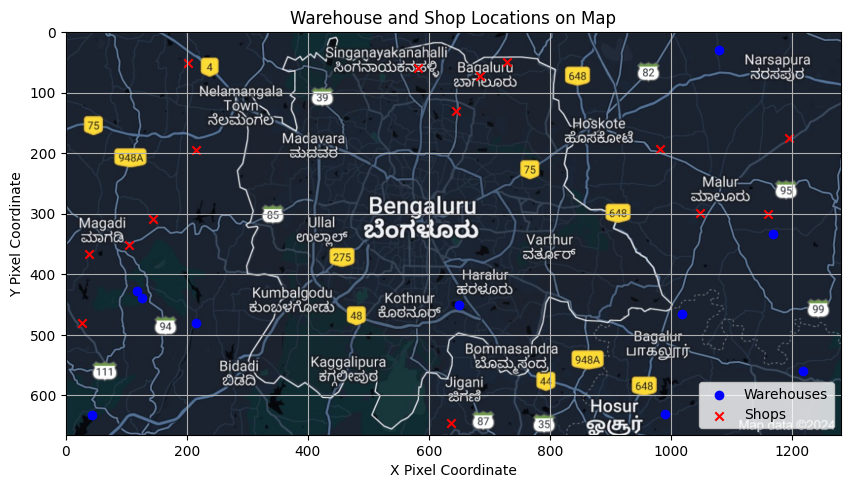

Data structure containing warehouse and shop coordinates:
{'warehouses': [(12.795157401611558, 77.85647119481446), (12.842594025041214, 78.01374983568465), (12.923050945389663, 77.2617656474058), (12.89509192232381, 77.322949751789), (12.993420332414042, 77.97963413483001), (12.930334255378781, 77.25631127797266), (12.915247678326534, 77.62263672457996), (12.905559368984497, 77.8755941157895), (12.793438514392815, 77.20547571571825), (13.197424950743528, 77.91841482940735)], 'shops': [(13.017185298224254, 77.89685002415064), (12.97105800426252, 77.20210321362866), (12.785308584541704, 77.613031609743), (12.981499972203405, 77.24674747324877), (13.129537846853644, 77.61899569698988), (13.01598405686245, 77.97427851354483), (13.1821770100467, 77.31459022414062), (13.010666815048856, 77.27449394305255), (12.895280344356456, 77.19402818082219), (13.16865339923345, 77.64600965598827), (13.086003477289625, 77.3237489848007), (13.177411602061225, 77.57554925033969), (13.099426291652037, 77.99

In [19]:
import random
import matplotlib.pyplot as plt
from PIL import Image

class LocationPlotter:
    def __init__(self, min_lat, max_lat, min_lon, max_lon, n_warehouses, m_shops, map_image_file):
        self.min_lat = min_lat
        self.max_lat = max_lat
        self.min_lon = min_lon
        self.max_lon = max_lon
        self.n_warehouses = n_warehouses
        self.m_shops = m_shops
        self.map_image_file = map_image_file
        self.warehouses = []
        self.shops = []
        self.map_extent = (min_lat, max_lat, min_lon, max_lon)
        
    def generate_random_coordinates(self, count):
        return [(random.uniform(self.min_lat, self.max_lat), random.uniform(self.min_lon, self.max_lon)) for _ in range(count)]
    
    def randomize_locations(self):
        self.warehouses = self.generate_random_coordinates(self.n_warehouses)
        self.shops = self.generate_random_coordinates(self.m_shops)
        
    def lat_lon_to_pixel(self, lat, lon, map_extent, image_size):
        min_lat, max_lat, min_lon, max_lon = map_extent
        img_width, img_height = image_size
        x = (lon - min_lon) / (max_lon - min_lon) * img_width
        y = (1 - (lat - min_lat) / (max_lat - min_lat)) * img_height
        return x, y

    def plot_on_map(self, output_file):
        # Load map image
        map_image = Image.open(self.map_image_file)
        img_width, img_height = map_image.size
        
        # Create a figure and axis
        fig, ax = plt.subplots(figsize=(10, 6))
        ax.imshow(map_image, extent=[0, img_width, img_height, 0])  # Set extent to map coordinates
        
        # Convert coordinates to pixel coordinates and plot
        warehouse_pixels = [self.lat_lon_to_pixel(lat, lon, self.map_extent, (img_width, img_height)) for lat, lon in self.warehouses]
        shop_pixels = [self.lat_lon_to_pixel(lat, lon, self.map_extent, (img_width, img_height)) for lat, lon in self.shops]
        
        warehouse_x, warehouse_y = zip(*warehouse_pixels) if warehouse_pixels else ([], [])
        shop_x, shop_y = zip(*shop_pixels) if shop_pixels else ([], [])
        
        ax.scatter(warehouse_x, warehouse_y, c='blue', label='Warehouses', marker='o')
        ax.scatter(shop_x, shop_y, c='red', label='Shops', marker='x')
        
        ax.set_xlabel('X Pixel Coordinate')
        ax.set_ylabel('Y Pixel Coordinate')
        ax.set_title('Warehouse and Shop Locations on Map')
        ax.legend()
        ax.grid(True)
        
        plt.savefig(output_file)
        plt.show()

# Parameters
min_lat, max_lat = 12.771994, 13.216678
min_lon, max_lon = 77.175047, 78.056476
n_warehouses = 10  # Number of warehouses
m_shops = 15       # Number of shops
map_image_file = '/Users/harish07/Documents/walmart/blr.jpeg'  # Path to your map image file
output_file = 'locations_on_map.png'

# Create LocationPlotter instance
plotter = LocationPlotter(min_lat, max_lat, min_lon, max_lon, n_warehouses, m_shops, map_image_file)

# Randomize locations
plotter.randomize_locations()

# Plot and save image
plotter.plot_on_map(output_file)

# Print data structure
print("Data structure containing warehouse and shop coordinates:")
print({
    'warehouses': plotter.warehouses,
    'shops': plotter.shops
})

(1280, 665)
(1280, 665)
(1280, 665)
(1280, 665)
(1280, 665)
(1280, 665)


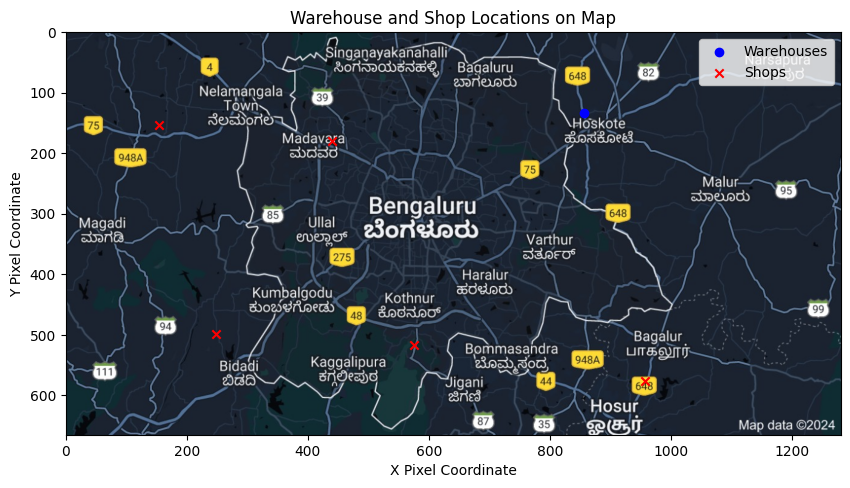

(1280, 665)
Pixel value at coordinates (439.7806441873131, 180.4334803178415): 0
(1280, 665)
Pixel value at coordinates (439.7806441873131, 180.4334803178415): 0
(1280, 665)
Pixel value at coordinates (249.01222999264516, 499.40414312934996): 0
(1280, 665)
Pixel value at coordinates (249.01222999264516, 499.40414312934996): 0


TypeError: land_cost() missing 1 required positional argument: 'lon'

In [43]:
import random
import math
import matplotlib.pyplot as plt
from PIL import Image

class LocationPlotter:
    def __init__(self, min_lat, max_lat, min_lon, max_lon, n_warehouses, m_shops, map_image_file):
        self.min_lat = min_lat
        self.max_lat = max_lat
        self.min_lon = min_lon
        self.max_lon = max_lon
        self.n_warehouses = n_warehouses
        self.m_shops = m_shops
        self.map_image_file = map_image_file
        self.warehouses = []
        self.shops = []
        self.map_extent = (min_lat, max_lat, min_lon, max_lon)
        
    def generate_random_coordinates(self, count):
        return [(random.uniform(self.min_lat, self.max_lat), random.uniform(self.min_lon, self.max_lon)) for _ in range(count)]
    
    def randomize_locations(self):
        self.warehouses = self.generate_random_coordinates(self.n_warehouses)
        self.shops = self.generate_random_coordinates(self.m_shops)
        
    def lat_lon_to_pixel(self, lat, lon, map_extent, image_size):
        min_lat, max_lat, min_lon, max_lon = map_extent
        print(image_size)
        img_width, img_height = image_size
        x = (lon - min_lon) / (max_lon - min_lon) * img_width
        y = (1 - (lat - min_lat) / (max_lat - min_lat)) * img_height
        return x, y

    def plot_on_map(self, output_file):
        # Load map image
        map_image = Image.open(self.map_image_file)
        img_width, img_height = map_image.size
        
        # Create a figure and axis
        fig, ax = plt.subplots(figsize=(10, 6))
        ax.imshow(map_image, extent=[0, img_width, img_height, 0])  # Set extent to map coordinates
        
        # Convert coordinates to pixel coordinates and plot
        warehouse_pixels = [self.lat_lon_to_pixel(lat, lon, self.map_extent, (img_width, img_height)) for lat, lon in self.warehouses]
        shop_pixels = [self.lat_lon_to_pixel(lat, lon, self.map_extent, (img_width, img_height)) for lat, lon in self.shops]
        
        warehouse_x, warehouse_y = zip(*warehouse_pixels) if warehouse_pixels else ([], [])
        shop_x, shop_y = zip(*shop_pixels) if shop_pixels else ([], [])
        
        ax.scatter(warehouse_x, warehouse_y, c='blue', label='Warehouses', marker='o')
        ax.scatter(shop_x, shop_y, c='red', label='Shops', marker='x')
        
        ax.set_xlabel('X Pixel Coordinate')
        ax.set_ylabel('Y Pixel Coordinate')
        ax.set_title('Warehouse and Shop Locations on Map')
        ax.legend()
        
        plt.savefig(output_file)
        plt.show()

    def calculate_score_and_profit(self, population_density, spending_amount, labor_availability, land_cost, 
                               max_stores_per_warehouse, profit_weight=1.0, land_cost_weight=1.0, labor_availability_weight=1.0):
        """
            Calculate the score and total profit for the positions of warehouses and stores.

            Parameters:
            - population_density: Function that takes a store index and returns its population density
            - spending_amount: Function that takes a store index and returns its spending amount
            - labor_availability: Function that takes a warehouse index and returns its labor availability
            - land_cost: Function that takes a warehouse index and returns its land cost
            - max_stores_per_warehouse: Maximum number of stores a warehouse can supply
            - profit_weight: Weight for the profit potential factor
            - land_cost_weight: Weight for the land cost factor
            - labor_availability_weight: Weight for the labor availability factor

            Returns:
            - score: The calculated score for the given configuration
            - total_profit: The total profit earned for the given configuration
        """
        # Calculate the distance between two points using Euclidean distance
        def euclidean_distance(coord1, coord2):
            return math.sqrt((coord1[0] - coord2[0])**2 + (coord1[1] - coord2[1])**2)

        # Assign stores to the nearest warehouse with capacity consideration
        store_to_warehouse = [-1] * len(self.shops)
        warehouse_store_count = [0] * len(self.warehouses)

        for store_idx, store in enumerate(self.shops):
            min_distance = float('inf')
            best_warehouse_idx = -1
            for warehouse_idx, warehouse in enumerate(self.warehouses):
                if warehouse_store_count[warehouse_idx] < max_stores_per_warehouse:
                    distance = euclidean_distance(store, warehouse)
                    if distance < min_distance:
                        min_distance = distance
                        best_warehouse_idx = warehouse_idx

            if best_warehouse_idx != -1:
                store_to_warehouse[store_idx] = best_warehouse_idx
                warehouse_store_count[best_warehouse_idx] += 1

        # Calculate the total score and total profit
        total_profit_potential = 0
        total_cost = 0
        total_profit = 0

        for store_idx, warehouse_idx in enumerate(store_to_warehouse):
            if warehouse_idx != -1:
                distance = euclidean_distance(self.shops[store_idx], self.warehouses[warehouse_idx])
                profit_potential = (spending_amount(self.shops[store_idx][0],self.shops[store_idx][1]) * population_density(self.shops[store_idx][0],self.shops[store_idx][1])) / (distance + 1)
                total_profit_potential += profit_weight * profit_potential

                # Calculate profit for each store
                profit = profit_weight * profit_potential
                total_profit += profit

        for warehouse_idx in range(len(self.warehouses)):
            cost = (land_cost_weight * land_cost(self.shops[store_idx][0],self.shops[store_idx][1])) - (labor_availability_weight * labor_availability(self.shops[store_idx][0],self.shops[store_idx][1]))
            total_cost += cost

        score = total_profit_potential - total_cost
        return score, total_profit


# Parameters
min_lat, max_lat = 12.771994, 13.216678
min_lon, max_lon = 77.175047, 78.056476
n_warehouses = 1  # Number of warehouses
m_shops = 5      # Number of shops
map_image_file = '/Users/harish07/Documents/walmart/blr.jpeg'  # Path to your map image file
output_file = 'locations_on_map.png'
pop_image_file = '/Users/harish07/Documents/walmart/blr_pop.png'
spend_image_file = '/Users/harish07/Documents/walmart/blr_pop.png'
labour_image_file = '/Users/harish07/Documents/walmart/blr_labour_avail.png'
lcost_image_file = '/Users/harish07/Documents/walmart/blr_lcost.png'

# Create LocationPlotter instance
plotter = LocationPlotter(min_lat, max_lat, min_lon, max_lon, n_warehouses, m_shops, map_image_file)

# Randomize locations
plotter.randomize_locations()

# Plot and save image
plotter.plot_on_map(output_file)

def population_density(lat, lon):
    image = Image.open(pop_image_file)
    x,y = plotter.lat_lon_to_pixel(lat,lon,(min_lat, max_lat, min_lon, max_lon),image.size)
    pixel_value = image.getpixel((x, y))
    print(f"Pixel value at coordinates ({x}, {y}): {pixel_value}")
    return pixel_value

def spending_amount(lat, lon):
    image = Image.open(spend_image_file)
    x,y = plotter.lat_lon_to_pixel(lat,lon,(min_lat, max_lat, min_lon, max_lon),image.size)
    pixel_value = image.getpixel((x, y))
    print(f"Pixel value at coordinates ({x}, {y}): {pixel_value}")
    return pixel_value

def labor_availability(lat, lon):
    image = Image.open(labour_image_file)
    x,y = plotter.lat_lon_to_pixel(lat,lon,(min_lat, max_lat, min_lon, max_lon),image.size)
    pixel_value = image.getpixel((x, y))
    print(f"Pixel value at coordinates ({x}, {y}): {pixel_value}")
    return pixel_value

def land_cost(lat, lon):
    image = Image.open(lcost_image_file)
    x,y = plotter.lat_lon_to_pixel(lat,lon,(min_lat, max_lat, min_lon, max_lon),image.size)
    pixel_value = image.getpixel((x, y))
    print(f"Pixel value at coordinates ({x}, {y}): {pixel_value}")
    return pixel_value
max_stores_per_warehouse = 2  # Maximum number of stores a warehouse can supply

# Control variables to adjust the importance of each factor
profit_weight = 1.5
land_cost_weight = 10000
labor_availability_weight = 0.8

# Calculate score and total profit
score, total_profit = plotter.calculate_score_and_profit(
    population_density, 
    spending_amount, 
    labor_availability, 
    land_cost,
    max_stores_per_warehouse, 
    profit_weight, 
    land_cost_weight, 
    labor_availability_weight
)

print("Score:", score)
#print("Total Profit:", total_profit)